In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:

df = pd.read_csv('../../data/processed/WaterUpdated.csv')
df.head()

,id,amount_tsh,gps_height,installer,longitude,latitude,basin,region,lga,ward,...,permit,extraction_type,management,payment,water_quality,quantity,source,waterpoint_type,target,time_passed
0,69572,6000.0,1390,Roman,34.938093,-9.856322,Lake Nyasa,Iringa,Ludewa,Mundindi,...,0,gravity,vwc,pay annually,soft,enough,spring,communal standpipe,functional,12
1,8776,0.0,1399,GRUMETI,34.698766,-2.147466,Lake Victoria,Mara,Serengeti,Natta,...,1,gravity,wug,never pay,soft,insufficient,rainwater harvesting,communal standpipe,functional,3
2,34310,25.0,686,World vision,37.460664,-3.821329,Pangani,Manyara,Simanjiro,Ngorika,...,1,gravity,vwc,pay per bucket,soft,enough,dam,communal standpipe multiple,functional,4
3,67743,0.0,263,UNICEF,38.486161,-11.155298,Ruvuma / Southern Coast,Mtwara,Nanyumbu,Nanyumbu,...,1,submersible,vwc,never pay,soft,dry,machine dbh,communal standpipe multiple,non functional,27
4,19728,0.0,0,Artisan,31.130847,-1.825359,Lake Victoria,Kagera,Karagwe,Nyakasimbi,...,1,gravity,other,never pay,soft,seasonal,rainwater harvesting,communal standpipe,functional,11


In [4]:
df.describe()

,id,amount_tsh,gps_height,longitude,latitude,population,public_meeting,permit,time_passed
count,57247.000000,57247.000000,57247.000000,57247.000000,5.724700e+04,57247.000000,57247.000000,57247.000000,57247.000000
mean,37111.315073,326.367720,667.788775,34.173051,-5.726248e+00,266.639247,0.863399,0.662131,13.871469
std,21451.932483,3051.082266,692.906254,6.328141,2.939058e+00,459.534102,0.343429,0.472988,10.136067
min,0.000000,0.000000,-90.000000,0.000000,-1.164944e+01,1.000000,0.000000,0.000000,0.000000
25%,18516.500000,0.000000,0.000000,33.107407,-8.569270e+00,65.000000,1.000000,0.000000,8.000000
50%,37069.000000,0.000000,370.000000,34.929707,-5.043410e+00,212.000000,1.000000,1.000000,11.000000
75%,55651.500000,25.000000,1316.000000,37.177828,-3.326886e+00,320.000000,1.000000,1.000000,16.000000
max,74247.000000,350000.000000,2770.000000,40.345193,-2.000000e-08,30500.000000,1.000000,1.000000,53.000000


In [5]:
df.loc[df.time_passed < 0]

,id,amount_tsh,gps_height,installer,longitude,latitude,basin,region,lga,ward,...,permit,extraction_type,management,payment,water_quality,quantity,source,waterpoint_type,target,time_passed


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57247 entries, 0 to 57246
Data columns (total 22 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               57247 non-null  int64  
 1   amount_tsh       57247 non-null  float64
 2   gps_height       57247 non-null  int64  
 3   installer        54186 non-null  object 
 4   longitude        57247 non-null  float64
 5   latitude         57247 non-null  float64
 6   basin            57247 non-null  object 
 7   region           57247 non-null  object 
 8   lga              57247 non-null  object 
 9   ward             57247 non-null  object 
 10  population       57247 non-null  float64
 11  public_meeting   57247 non-null  int64  
 12  permit           57247 non-null  int64  
 13  extraction_type  57247 non-null  object 
 14  management       57247 non-null  object 
 15  payment          57247 non-null  object 
 16  water_quality    57247 non-null  object 
 17  quantity    

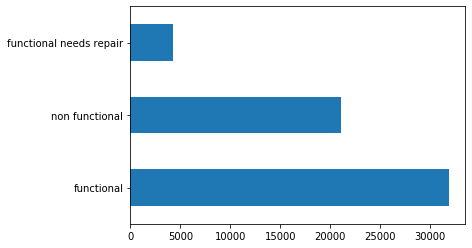

In [7]:
# visualizing the target variable
# some class imbalance, especially the functional needs repair category is under-represented
df.target.value_counts().plot.barh();

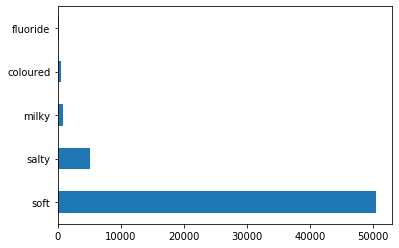

In [8]:
# Most water quality is 'soft'
df.water_quality.value_counts().plot.barh();

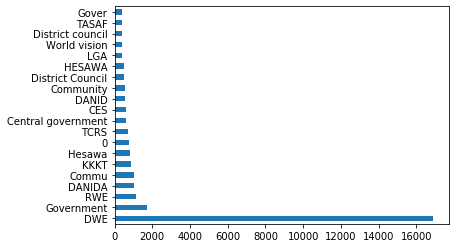

In [9]:
# One installer DWE accounts for about a third of observations
df.installer.value_counts().head(20).plot.barh();

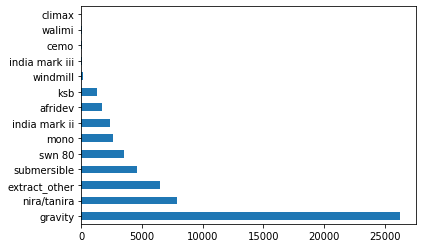

In [10]:
# most extraction type(around half) are of type 'gravity', 'other' is a substantial column here
df.extraction_type.value_counts().plot.barh();

In [11]:
#closer look at extraction_type
df.extraction_type.value_counts().cumsum()

gravity           26277
nira/tanira       34191
extract_other     40710
submersible       45284
swn 80            48839
mono              51471
india mark ii     53809
afridev           55550
ksb               56884
windmill          56994
india mark iii    57086
cemo              57176
walimi            57223
climax            57247
Name: extraction_type, dtype: int64

In [12]:
df.columns

Index(['id', 'amount_tsh', 'gps_height', 'installer', 'longitude', 'latitude',
       'basin', 'region', 'lga', 'ward', 'population', 'public_meeting',
       'permit', 'extraction_type', 'management', 'payment', 'water_quality',
       'quantity', 'source', 'waterpoint_type', 'target', 'time_passed'],
      dtype='object')

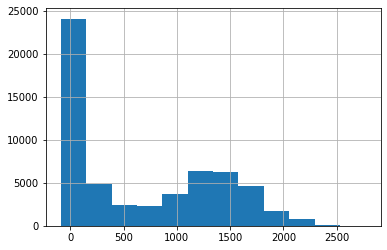

In [13]:
# altitude distributions -- many are around zero
df.gps_height.hist(bins=12);

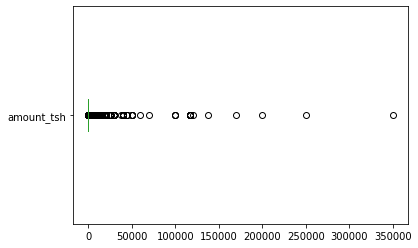

In [14]:
# amount tsh (total static head -- amount water available to waterpoint)
# couple huge outliers here
df.amount_tsh.plot.box(vert=False)

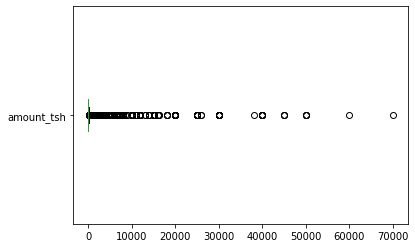

In [15]:
# Still big outliers, looks like most points are below 10k
df.loc[df.amount_tsh < 100000, 'amount_tsh'].plot.box(vert=False)

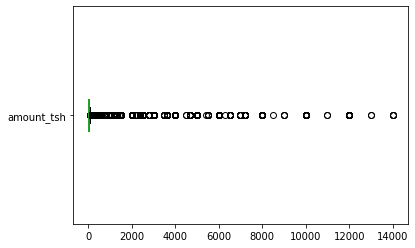

In [16]:
df.loc[df.amount_tsh < 15000, 'amount_tsh'].plot.box(vert=False)

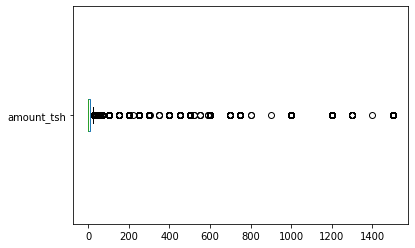

In [17]:
df.loc[df.amount_tsh < 2000, 'amount_tsh'].plot.box(vert=False)

In [18]:
# Almost all entries are less than 15k
len(df.loc[df.amount_tsh < 15000, 'amount_tsh'])/len(df)

0.9978863521232554

In [19]:
# ditto 5k
len(df.loc[df.amount_tsh < 5000, 'amount_tsh'])/len(df)

0.9841214386780093

In [20]:
# ...and 2k
len(df.loc[df.amount_tsh < 2000, 'amount_tsh'])/len(df)

0.9567313571016822

In [21]:
# 70 percent of values are zero. Max value is ~350000.. what's up with that? data issue or just 
# really small water values?
len(df.loc[df.amount_tsh == 0, 'amount_tsh'])/len(df)

0.69385295299317

In [22]:
df.columns

Index(['id', 'amount_tsh', 'gps_height', 'installer', 'longitude', 'latitude',
       'basin', 'region', 'lga', 'ward', 'population', 'public_meeting',
       'permit', 'extraction_type', 'management', 'payment', 'water_quality',
       'quantity', 'source', 'waterpoint_type', 'target', 'time_passed'],
      dtype='object')

(28, 42)

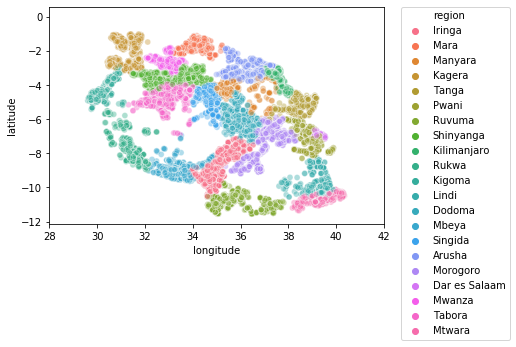

In [51]:
functional = df.loc[df.target=='functional']
sns.scatterplot('longitude', 'latitude', data=functional, alpha=0.4, hue='region')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.xlim(28, 42)

(28, 42)

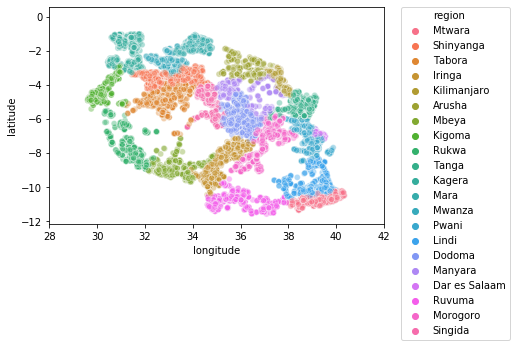

In [52]:
non_functional = df.loc[df.target=='non functional']
sns.scatterplot('longitude', 'latitude', data=non_functional, alpha=0.4, hue='region')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.xlim(28, 42)

(28, 42)

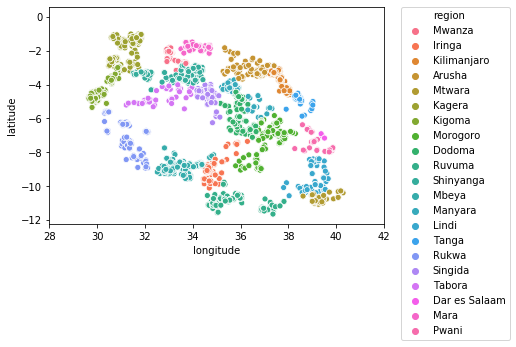

In [47]:
functional_needs_repair = df.loc[df.target=='functional needs repair']
sns.scatterplot('longitude', 'latitude', data=functional_needs_repair, hue='region')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.xlim(28, 42)

(28, 42)

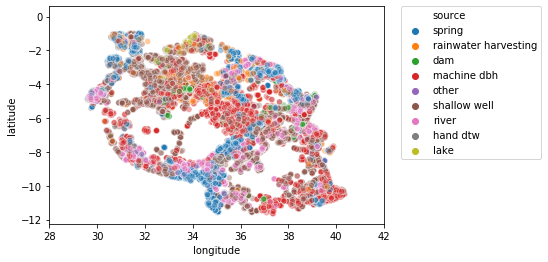

In [61]:
sns.scatterplot('longitude', 'latitude', data=df, alpha=0.4, hue='source')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.xlim(28, 42)

In [62]:
# about 1600 entries have longitude of zero
len(df.loc[df.longitude == df.longitude.min()])

1593